In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
database = pd.read_csv('database.csv')
database.head(100)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,329,normal,7.265076,6.490719,5.837105,7.861153,2.958316,6.915526,5.164356,5.191775,...,11.512426,10.687612,13.186275,12.790031,3.798619,3.165678,2.758158,2.494656,3.092373,2.830248
1,330,normal,7.294932,6.455398,5.497091,7.693888,3.048464,6.997462,5.118763,5.323904,...,11.382575,10.496178,13.163114,12.677342,3.971772,3.420614,2.831661,2.472950,3.034824,2.924207
2,331,normal,8.101461,6.606037,5.809597,7.566532,2.915527,6.695817,5.084102,4.924389,...,11.564506,10.643955,13.181717,12.782085,4.223112,3.303236,2.782225,2.522477,3.144511,2.715381
3,332,normal,8.149318,6.181394,5.523731,7.585691,3.085838,7.096813,5.163067,4.877522,...,11.731514,10.644385,13.266748,12.822743,4.291681,3.811840,3.138734,2.691352,3.159991,2.980692
4,333,normal,7.761231,6.392766,6.036852,7.624368,2.851356,6.795762,4.953513,4.973692,...,11.692599,11.254999,13.397345,12.944275,3.716410,3.307700,2.662943,2.534129,2.967716,3.029605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,415,HCC,7.603701,6.668540,6.077177,7.892481,2.948287,7.124946,4.999055,4.810050,...,11.776256,10.966664,13.265957,12.973812,3.646501,3.353687,2.732212,2.449685,2.976476,2.712410
87,416,HCC,8.254075,6.161498,7.345367,7.834403,3.080809,7.501306,4.981927,4.883849,...,11.175516,10.284578,13.127396,12.736350,3.538371,3.105118,2.699855,2.605626,3.081169,2.906420
88,417,HCC,6.023968,6.334862,5.289798,7.007862,2.917750,6.601798,4.773416,4.936188,...,11.656358,10.993225,13.345249,12.841162,3.624091,3.414852,2.763142,2.591604,3.239656,3.493460
89,418,HCC,7.283903,6.634105,5.520006,7.577564,2.709552,6.908117,5.140040,5.058419,...,11.632040,10.964797,13.449495,12.921627,3.655687,3.229956,2.572953,2.517827,3.064679,2.669326


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 81.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

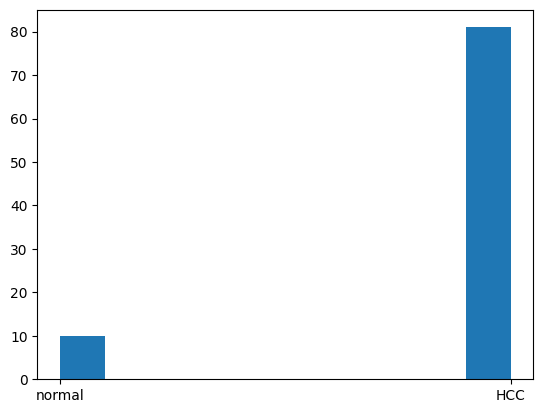

In [3]:
# visualizar a distribuição dos dados
plt.hist(database['type'], bins=10)

In [4]:
# separar os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(database.drop(['type','samples'], axis=1), database['type'], test_size=0.30, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63, 54675), (28, 54675), (63,), (28,))

In [6]:
y_train.value_counts(), y_test.value_counts()

(HCC       55
 normal     8
 Name: type, dtype: int64,
 HCC       26
 normal     2
 Name: type, dtype: int64)

# Aprendizagem de Máquina - Árvores de Decisão

In [7]:
# treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# encontrar quais são as features mais importantes e organizar em ordem decrescente
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

for i in range(X_train.shape[1]):
    print(f"{i+1} {feature_names[indices[i]]} {importances[indices[i]]}")


1 220085_at 0.030000000000000002
2 203214_x_at 0.020000000000000004
3 205019_s_at 0.020000000000000004
4 201555_at 0.020000000000000004
5 210975_x_at 0.01891938250428817
6 201729_s_at 0.010000000000000002
7 202758_s_at 0.010000000000000002
8 202227_s_at 0.010000000000000002
9 1557583_at 0.010000000000000002
10 209786_at 0.010000000000000002
11 221522_at 0.010000000000000002
12 213478_at 0.010000000000000002
13 222608_s_at 0.010000000000000002
14 1559017_at 0.010000000000000002
15 231027_at 0.010000000000000002
16 232836_at 0.010000000000000002
17 209976_s_at 0.010000000000000002
18 239236_at 0.010000000000000002
19 224207_x_at 0.010000000000000002
20 205339_at 0.010000000000000002
21 238777_x_at 0.010000000000000002
22 226911_at 0.010000000000000002
23 1554769_at 0.010000000000000002
24 206157_at 0.010000000000000002
25 232772_at 0.010000000000000002
26 219918_s_at 0.010000000000000002
27 213586_at 0.010000000000000002
28 230076_at 0.010000000000000002
29 219029_at 0.010000000000000002

In [9]:
# prever os dados de teste
y_pred = rf.predict(X_test)

# avaliar o modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

<Axes: >

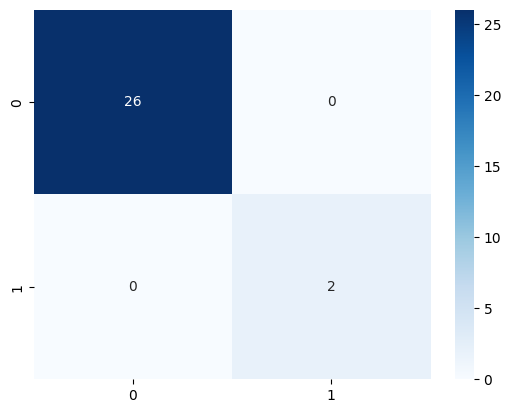

In [10]:
# visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

<Axes: >

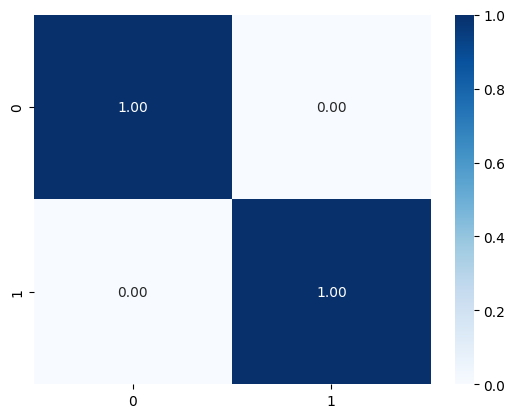

In [11]:
# visualizar a matriz de confusão normalizada
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f')

In [12]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/jonathan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


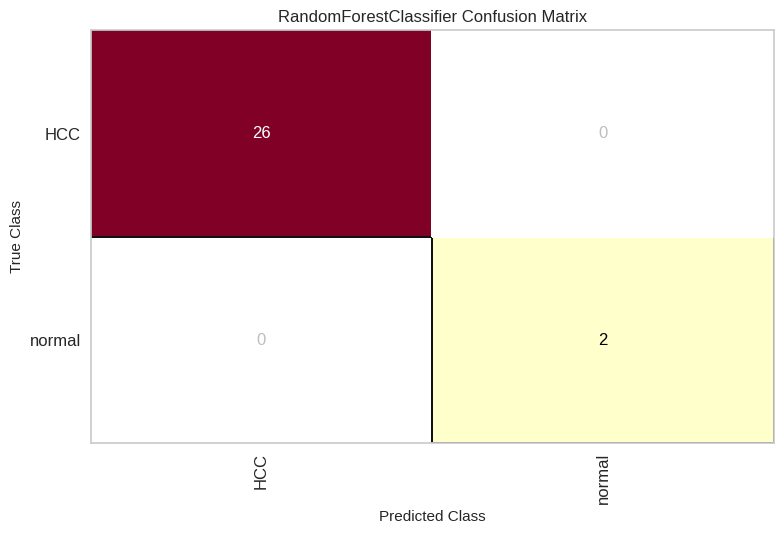

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [13]:
# matriz de confusao com yellowbrick
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()


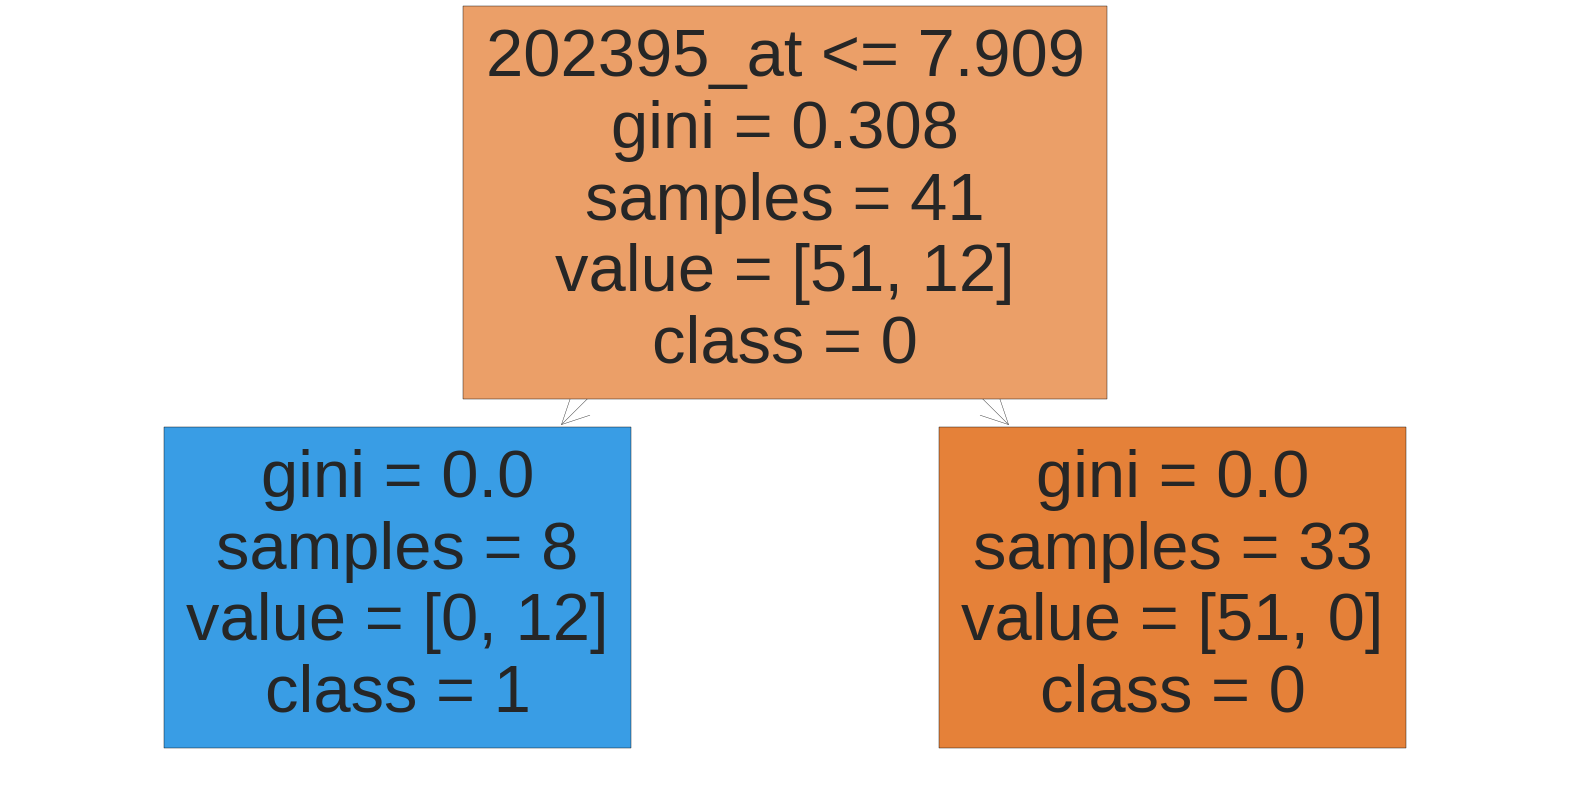

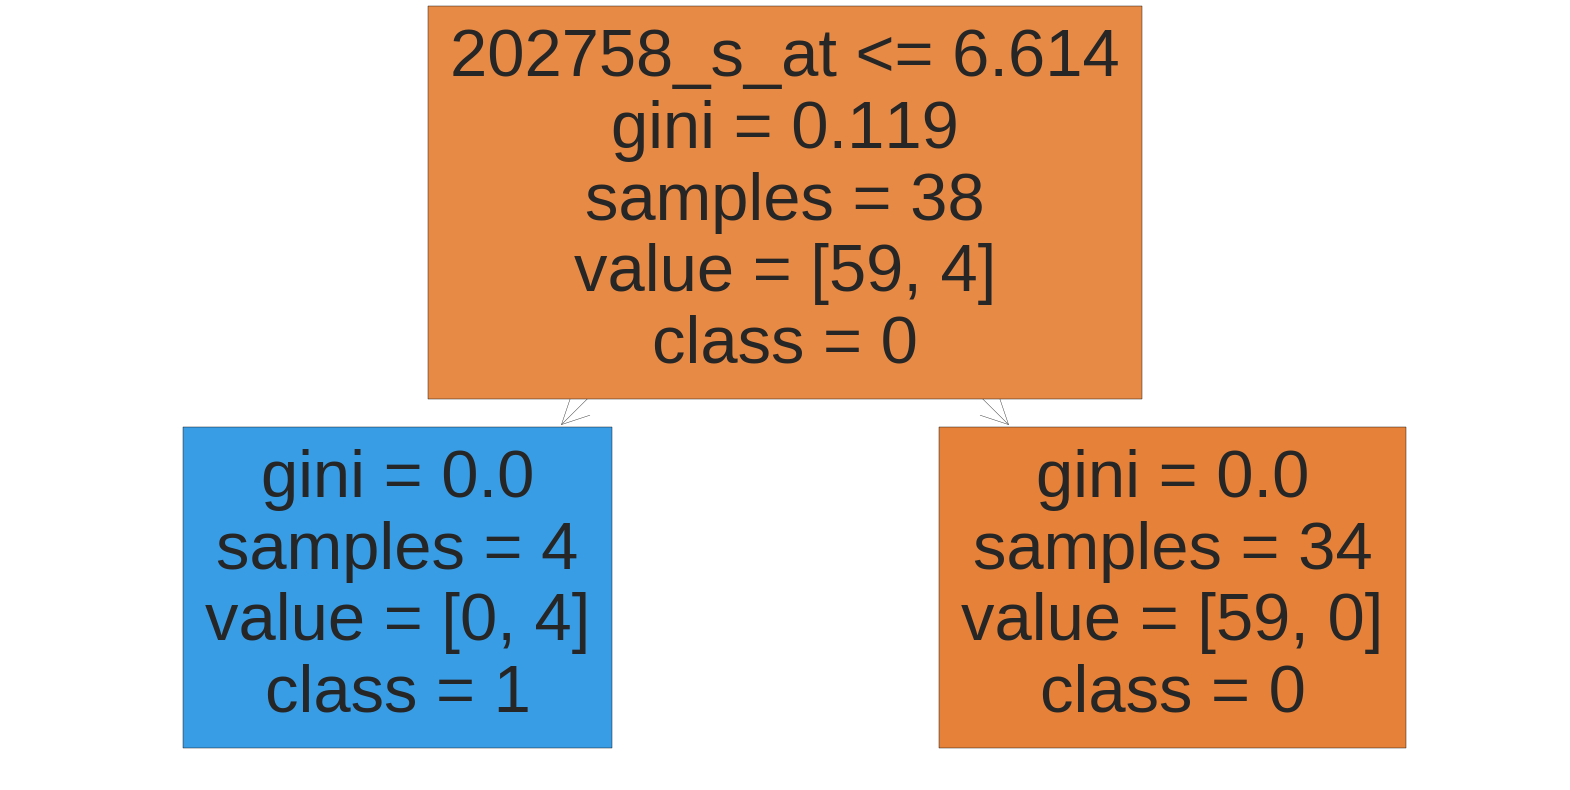

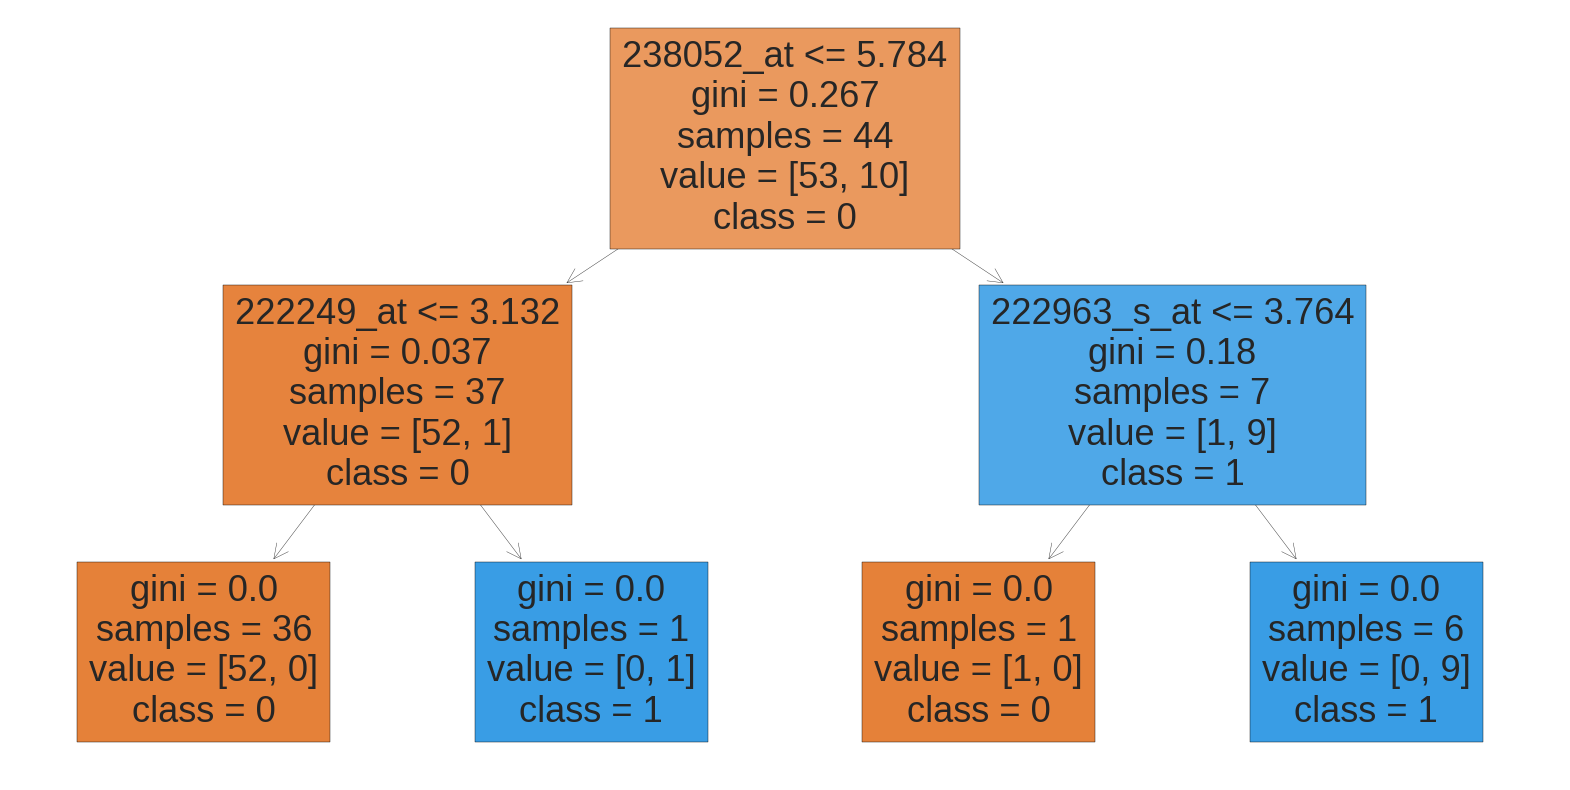

In [14]:
# plot the trees in the forest
from sklearn.tree import plot_tree
for i in range(3):
    plt.figure(figsize=(20,10))
    plot_tree(rf.estimators_[i], feature_names=feature_names, class_names=['0','1'], filled=True)
    plt.show()